In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import f1_score, root_mean_squared_error

from numpy import linspace, mean
import plotly.express as px

## Carregar e visualizar os dados  - Regressão


In [2]:
df_colesterol = pd.read_csv('./dataset_colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [4]:
df_colesterol.describe()

,Id,Idade,Peso,Altura,Colesterol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.160000,76.487500,174.868000,199.453260
std,288.819436,17.494755,21.411086,8.855337,50.625152
min,1.000000,20.000000,15.400000,160.000000,36.260000
25%,250.750000,34.000000,61.775000,167.000000,166.345000
50%,500.500000,48.500000,75.450000,175.000000,199.455000
75%,750.250000,64.250000,89.975000,183.000000,233.785000
max,1000.000000,79.000000,158.100000,190.000000,372.670000


In [5]:
df_colesterol.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23


In [6]:
# Ajustar o Dataframe
df_colesterol.drop(columns=['Id'],axis=1,inplace=True)

# Aplicar OneHotEncoding nas variáveis Categoricas
df_colesterol = pd.get_dummies(df_colesterol,columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade']).astype("int64")

In [7]:
df_colesterol.head()

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85,186,199,0,0,1,0,0,1,0,1,0
1,68,105,184,236,1,0,0,0,1,0,0,0,1
2,25,64,180,161,0,0,0,1,1,0,1,0,0
3,43,120,167,336,1,0,0,0,1,0,1,0,0
4,79,88,175,226,0,1,0,0,1,0,0,1,0


In [8]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Idade                        1000 non-null   int64
 1   Peso                         1000 non-null   int64
 2   Altura                       1000 non-null   int64
 3   Colesterol                   1000 non-null   int64
 4   Grupo Sanguíneo_A            1000 non-null   int64
 5   Grupo Sanguíneo_AB           1000 non-null   int64
 6   Grupo Sanguíneo_B            1000 non-null   int64
 7   Grupo Sanguíneo_O            1000 non-null   int64
 8   Fumante_Não                  1000 non-null   int64
 9   Fumante_Sim                  1000 non-null   int64
 10  Nível de Atividade_Alto      1000 non-null   int64
 11  Nível de Atividade_Baixo     1000 non-null   int64
 12  Nível de Atividade_Moderado  1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


## Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [9]:
X = df_colesterol.drop(columns="Colesterol", axis=1)
y = df_colesterol['Colesterol']

In [10]:
model_reg = LinearRegression()

In [11]:
# Gerar scores da curva de aprendizado
train_sizes_abs,train_scores,test_scores =learning_curve(model_reg, X,y,train_sizes=linspace(0.1,0.9,9), scoring='neg_mean_squared_error', cv=3)

In [12]:
# Train Scores
train_scores

array([[-47.75103189, -74.85407523, -74.85407523],
       [-56.10763542, -89.26268166, -89.26268166],
       [-63.8801819 , -82.14829732, -82.14829732],
       [-68.74856847, -81.24164923, -81.24164923],
       [-66.75496027, -82.53377357, -82.53377357],
       [-65.50400885, -78.15630063, -78.8827305 ],
       [-67.49273681, -78.40207025, -76.73394087],
       [-68.13857081, -77.29484462, -77.13054306],
       [-71.43770396, -79.41483202, -77.69306182]])

In [13]:
# Quantidades
train_sizes_abs

array([ 66, 133, 199, 266, 333, 399, 466, 532, 599])

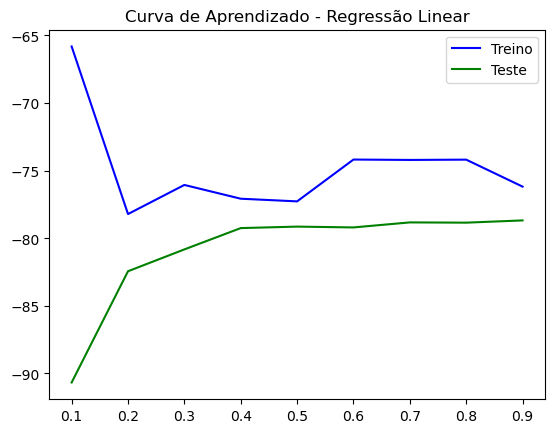

In [14]:
# Gerar Plot com Curva de aprendizado
plt.plot(linspace(0.1,0.9,9), mean(train_scores, axis=1),color='b',label='Treino')
plt.plot(linspace(0.1,0.9,9), mean(test_scores, axis=1),color='g',label='Teste')
plt.title('Curva de Aprendizado - Regressão Linear')
plt.legend()
plt.show()

## Calcular PPS - Classificação

In [15]:
df2 = pd.read_csv('./fruit_quality.csv')

In [16]:
df2.drop('A_id', axis=1, inplace=True)
df2['Quality'] = (df2["Quality"] == "good").astype('int32')

df2.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Treinar modelo KNN com mudança de K

In [17]:
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [19]:
# Faz um loop para treinar o modelo com diversas quantidades de vizinhos

scores_train = []
scores_test = []

for i in range(1,20,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))

    print(f'{i}: F1_Train: {f1_score(y_train, y_train_pred)} F1_Test: {f1_score(y_test, y_test_pred)}')

1: F1_Train: 1.0 F1_Test: 0.8740617180984154
3: F1_Train: 0.9452103216684341 F1_Test: 0.8964941569282137
5: F1_Train: 0.9262266148958701 F1_Test: 0.8985985160758451
7: F1_Train: 0.921935711762628 F1_Test: 0.8929460580912864
9: F1_Train: 0.9186704384724187 F1_Test: 0.8913043478260869
11: F1_Train: 0.9178130511463845 F1_Test: 0.8887029288702929
13: F1_Train: 0.9115983026874116 F1_Test: 0.8881469115191987
15: F1_Train: 0.9133969600565571 F1_Test: 0.890728476821192
17: F1_Train: 0.9099258212645708 F1_Test: 0.8883333333333333
19: F1_Train: 0.9115885875308207 F1_Test: 0.885


In [20]:
# Criar um DataFrame com os scores
df_results = pd.DataFrame({'k': range(1,20,2), 'Train': scores_train,'Test': scores_test})

In [21]:
df_results

,k,Train,Test
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


In [23]:
# Mostrar PLot Com scores
xaxis = x = [i for i in range(1,20,2)]
fig = px.line(df_results,x='k',y=['Train','Test'],title='KNN Performance - Mudando K')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()